# Used Car Price Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* Prediction results can be used to give new seller the price suggestion based on market condition.

### 2.1 Import Data and Required Packages

In [45]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



In [46]:
df = pd.read_csv(r"./data/raw.csv")

**Show Top 5 Records**

In [47]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Shape of the dataset**

In [48]:
df.shape

(7906, 12)

**Summary of the dataset**

In [49]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


**Check Datatypes in the dataset**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 741.3+ KB


In [51]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [52]:
# creating brand & model coulumn from extracting details from name column
df['brand'] = df['name'].str.split(' ',n=3,expand= True)[0]
df['model']= df['name'].str.split(' ',n=2,expand= True)[1]

# Exploring Dataset

In [53]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categoric_feature = [feature for feature in df.columns if df[feature].dtype =='O']

print(f"We have {len(numeric_feature)} Numeric features : {numeric_feature}")
print(f"We have {len(categoric_feature)} Categoric features : {categoric_feature}")

We have 7 Numeric features : ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
We have 7 Categoric features : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model']


# Feature Information
* **name:** Brand name and Model name of car
* **Year :** Year of Manufacturing
* **selling_price :** The selling price of car
* **km_driven :** Total kilometer car driven
* **feul :** Feul type of car
* **seller_type :**  Which Type of seller is selling the used car
* **transmission :** Transmission used in the used car
* **owner :** Shows the Number of owmers
* **milage :** Milege of car in per kilometer
* **engine :** It is engine capacity in cubic centimeter
* **max_power :**  power it produces in BHP.
* **seat :** Total number of seat in car
* **brand :** Brand name of perticular car
* **model :** Model name of perticular car

In [54]:
for feature in categoric_feature:
    print(feature)
    print(df[feature].value_counts(normalize=True)*100)
    print("-------------------------------------------\n")

name
name
Maruti Swift Dzire VDI                          1.631672
Maruti Alto 800 LXI                             1.037187
Maruti Alto LXi                                 0.898052
BMW X4 M Sport X xDrive20d                      0.784215
Maruti Swift VDI                                0.771566
                                                  ...   
Honda Jazz 1.2 S AT i VTEC                      0.012649
Hyundai i20 Active 1.2 SX with AVN              0.012649
Ambassador CLASSIC 1500 DSL AC                  0.012649
Tata Harrier XZ Dark Edition BSIV               0.012649
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV    0.012649
Name: proportion, Length: 1982, dtype: float64
-------------------------------------------

fuel
fuel
Diesel    54.376423
Petrol    44.523147
CNG        0.657728
LPG        0.442702
Name: proportion, dtype: float64
-------------------------------------------

seller_type
seller_type
Individual          83.012902
Dealer              14.002024
Trustmark Dealer   

# Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

ValueError: num must be an integer with 1 <= num <= 6, not 7

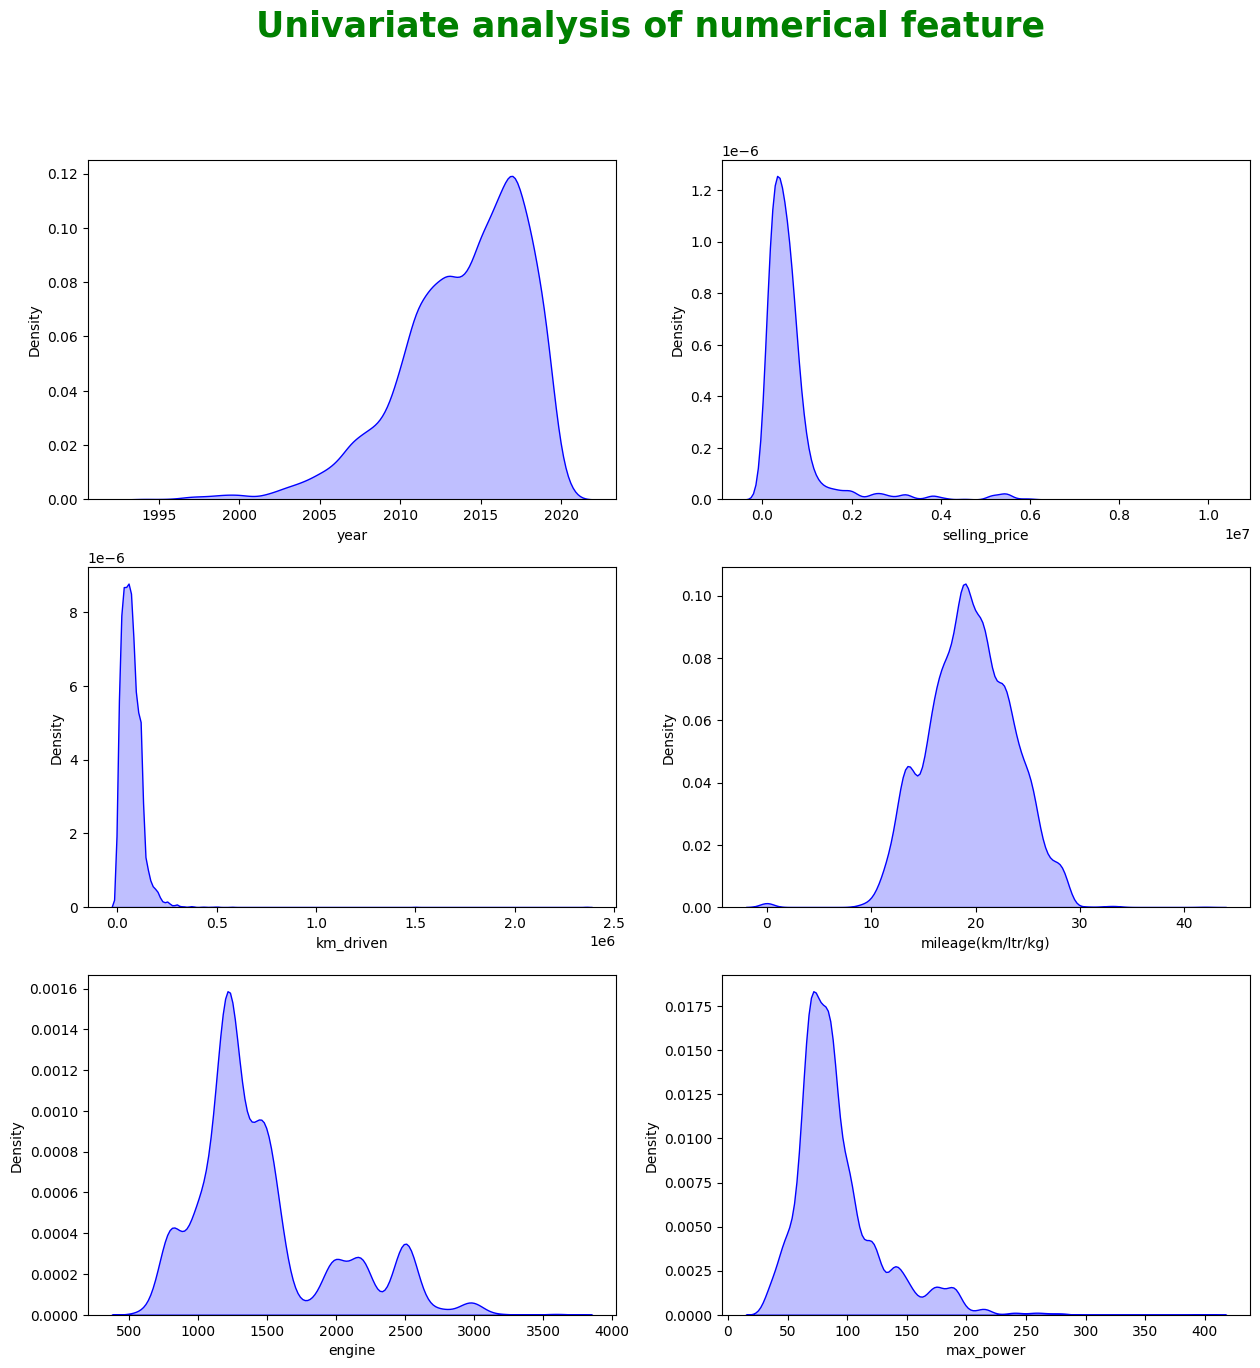

In [55]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical feature",fontsize=25,fontweight='bold',color='g')

for i in range(0,len(numeric_feature)):
    plt.subplot(3,2,1+i)
    sns.kdeplot(x=df[numeric_feature[i]],shade=True,color='b')
    

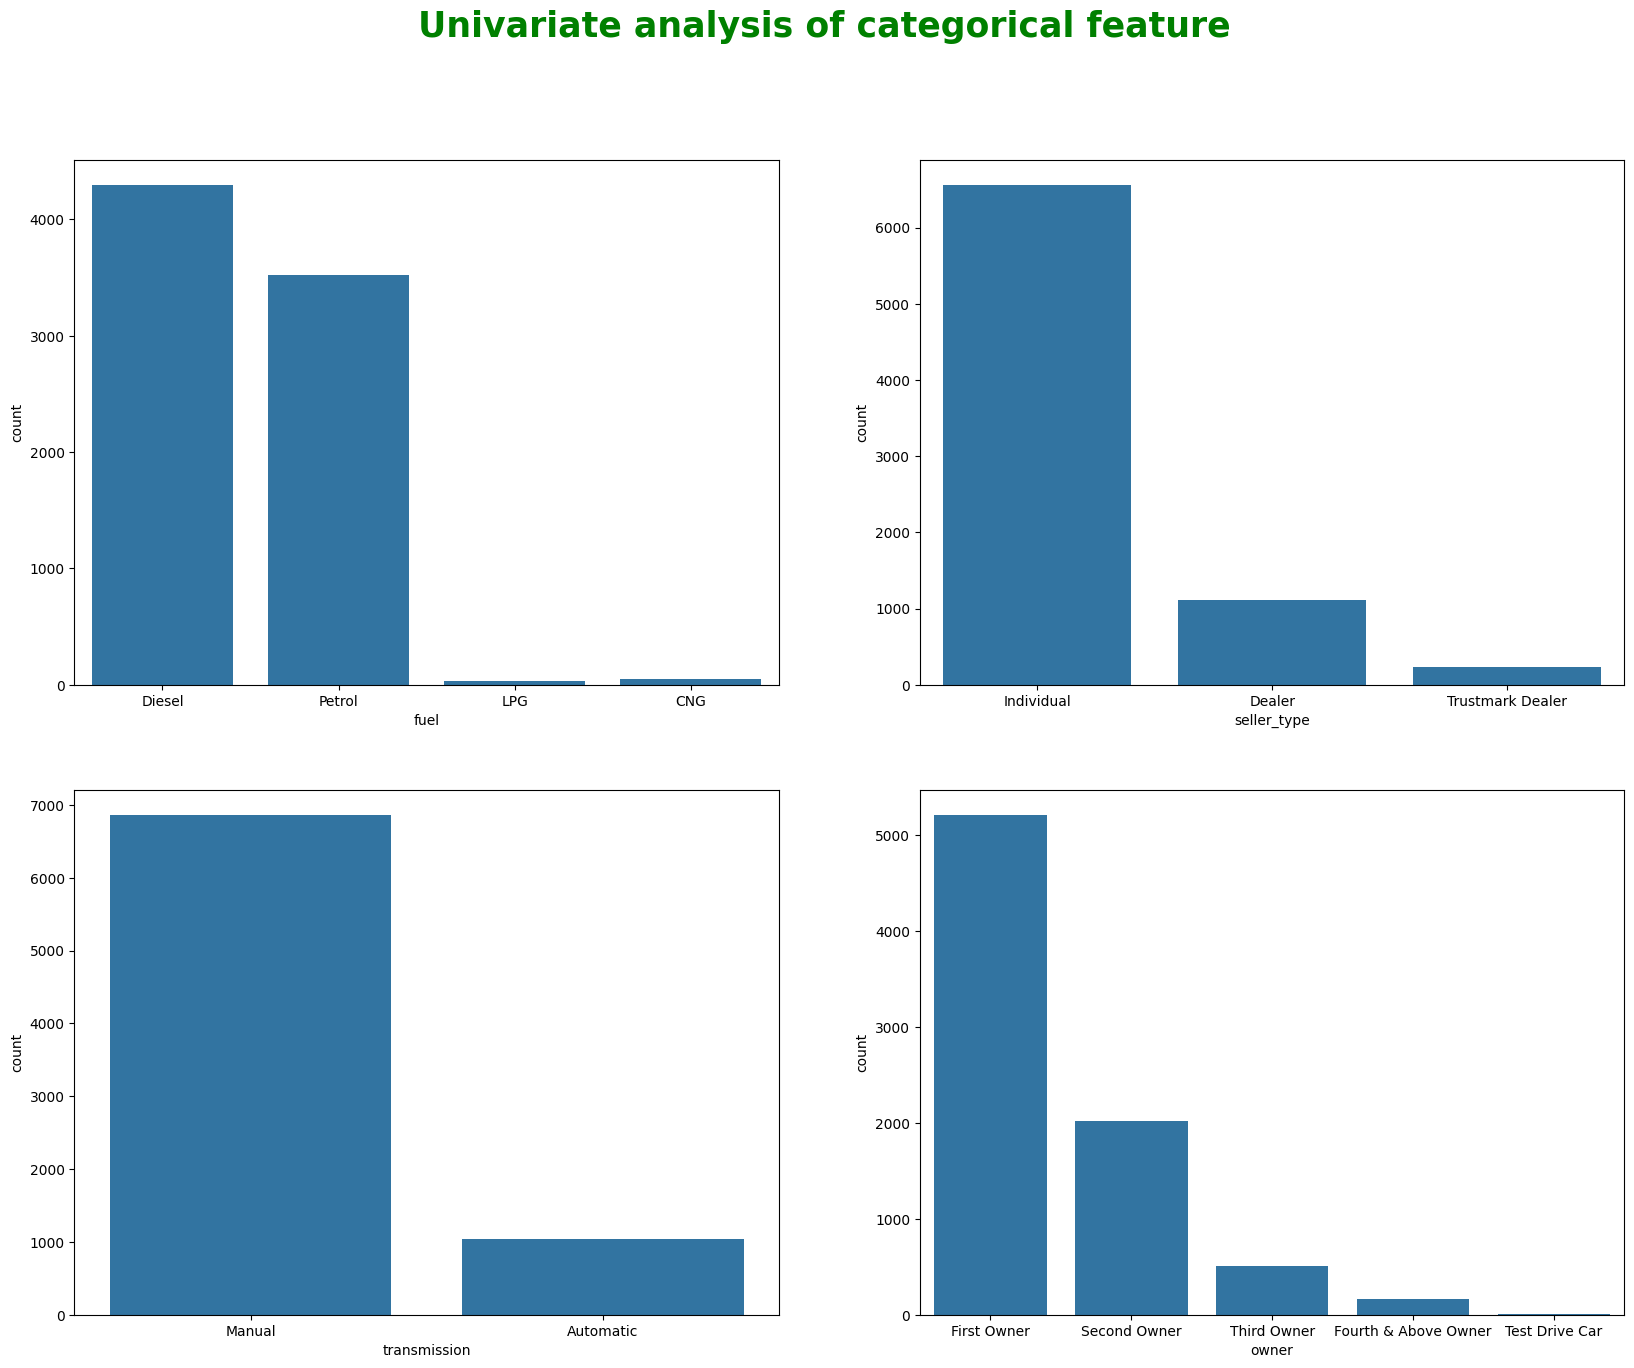

In [56]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate analysis of categorical feature",fontsize=25,fontweight='bold',color='g')
cat1= ['fuel', 'seller_type', 'transmission', 'owner']

for i in range(0,len(cat1)):
    plt.subplot(2,2,1+i)
    sns.countplot(x=df[cat1[i]])

ValueError: num must be an integer with 1 <= num <= 6, not 7

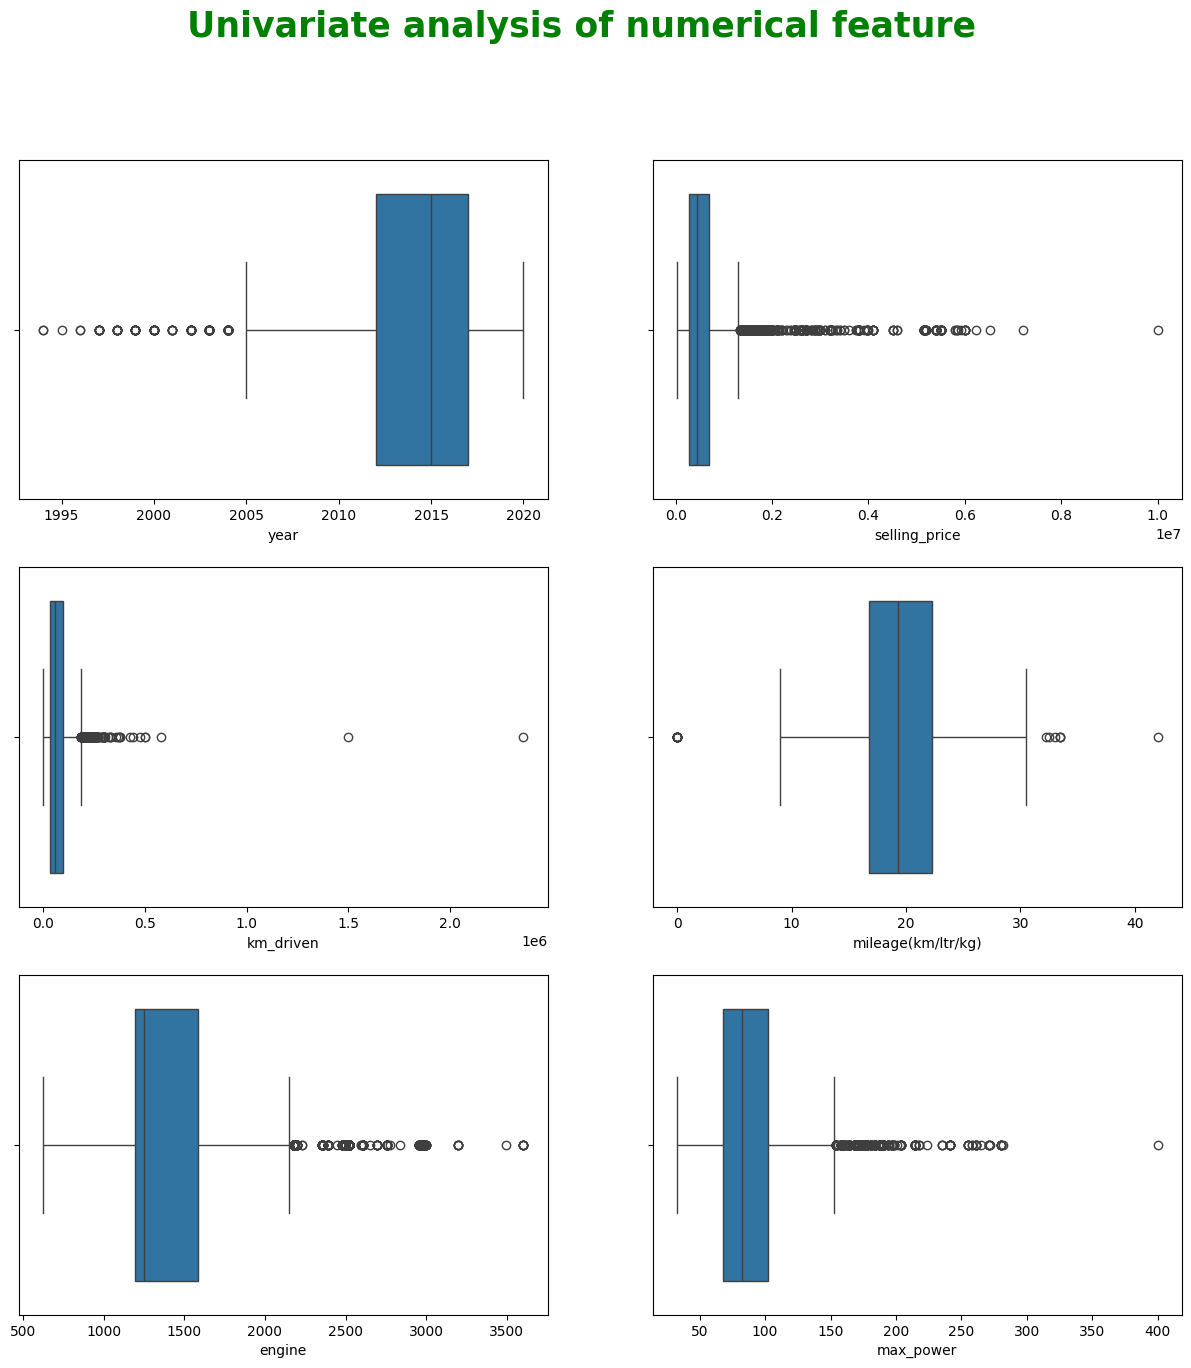

In [57]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical feature",fontsize=25,fontweight='bold',color='g')

for i in range(0,len(numeric_feature)):
    plt.subplot(3,2,1+i)
    sns.boxplot(x=df[numeric_feature[i]])
    

**Report** 
* here we can see that in each column outliers are present.

In [58]:
df.corr(numeric_only=True) 

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
year,1.000000,0.412302,-0.428548,0.328544,0.018263,0.226598,-0.007923
selling_price,0.412302,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617
km_driven,-0.428548,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259
mileage(km/ltr/kg),0.328544,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700
engine,0.018263,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103
max_power,0.226598,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999
seats,-0.007923,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000


<Axes: >

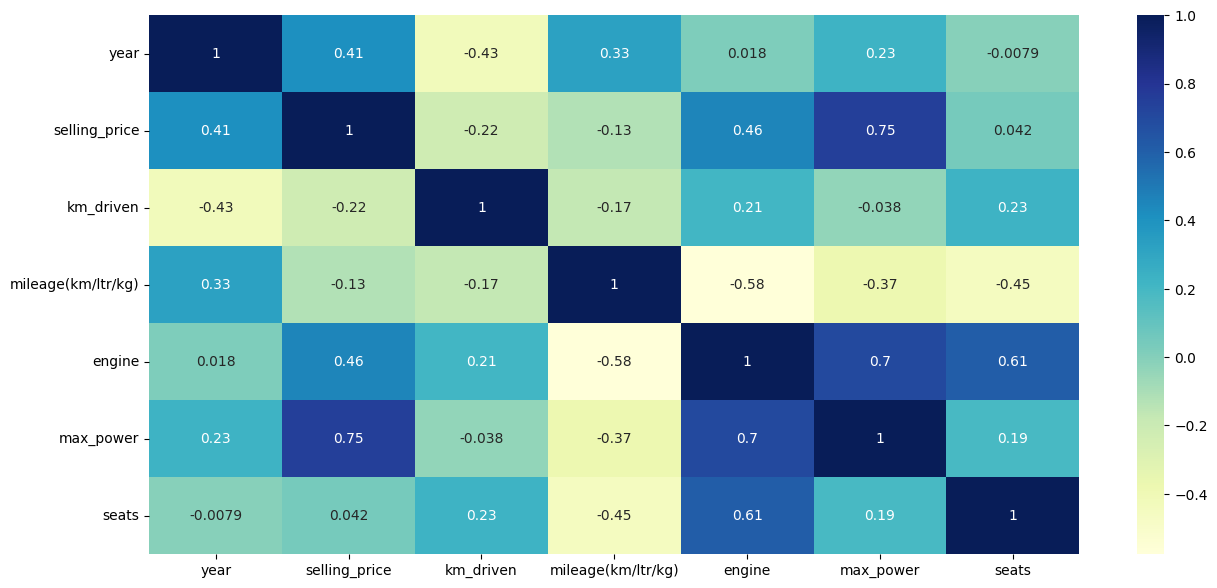

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap ='YlGnBu' )

**Report** 
* Our target column Sellin Price has a weak positive correlation on km_driven and milage  and little strong correlation with engine,seat.

In [60]:
### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Selling Price**

In [61]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categoric_feature:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categoric_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,name,Reject Null Hypothesis
1,fuel,Reject Null Hypothesis
2,seller_type,Reject Null Hypothesis
3,transmission,Reject Null Hypothesis
4,owner,Reject Null Hypothesis
5,brand,Reject Null Hypothesis
6,model,Reject Null Hypothesis


**Report** 
* Here all are  to Rejects Null Hypothesis which means it doesn't correlate with target column.

## cheking null values

In [62]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
brand                 0
model                 0
dtype: int64

**Report** 
* Here we can see that in milage,engine,max_power and seat column some null values are present.

In [66]:
continues_features = [feature for feature in numeric_feature if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power']


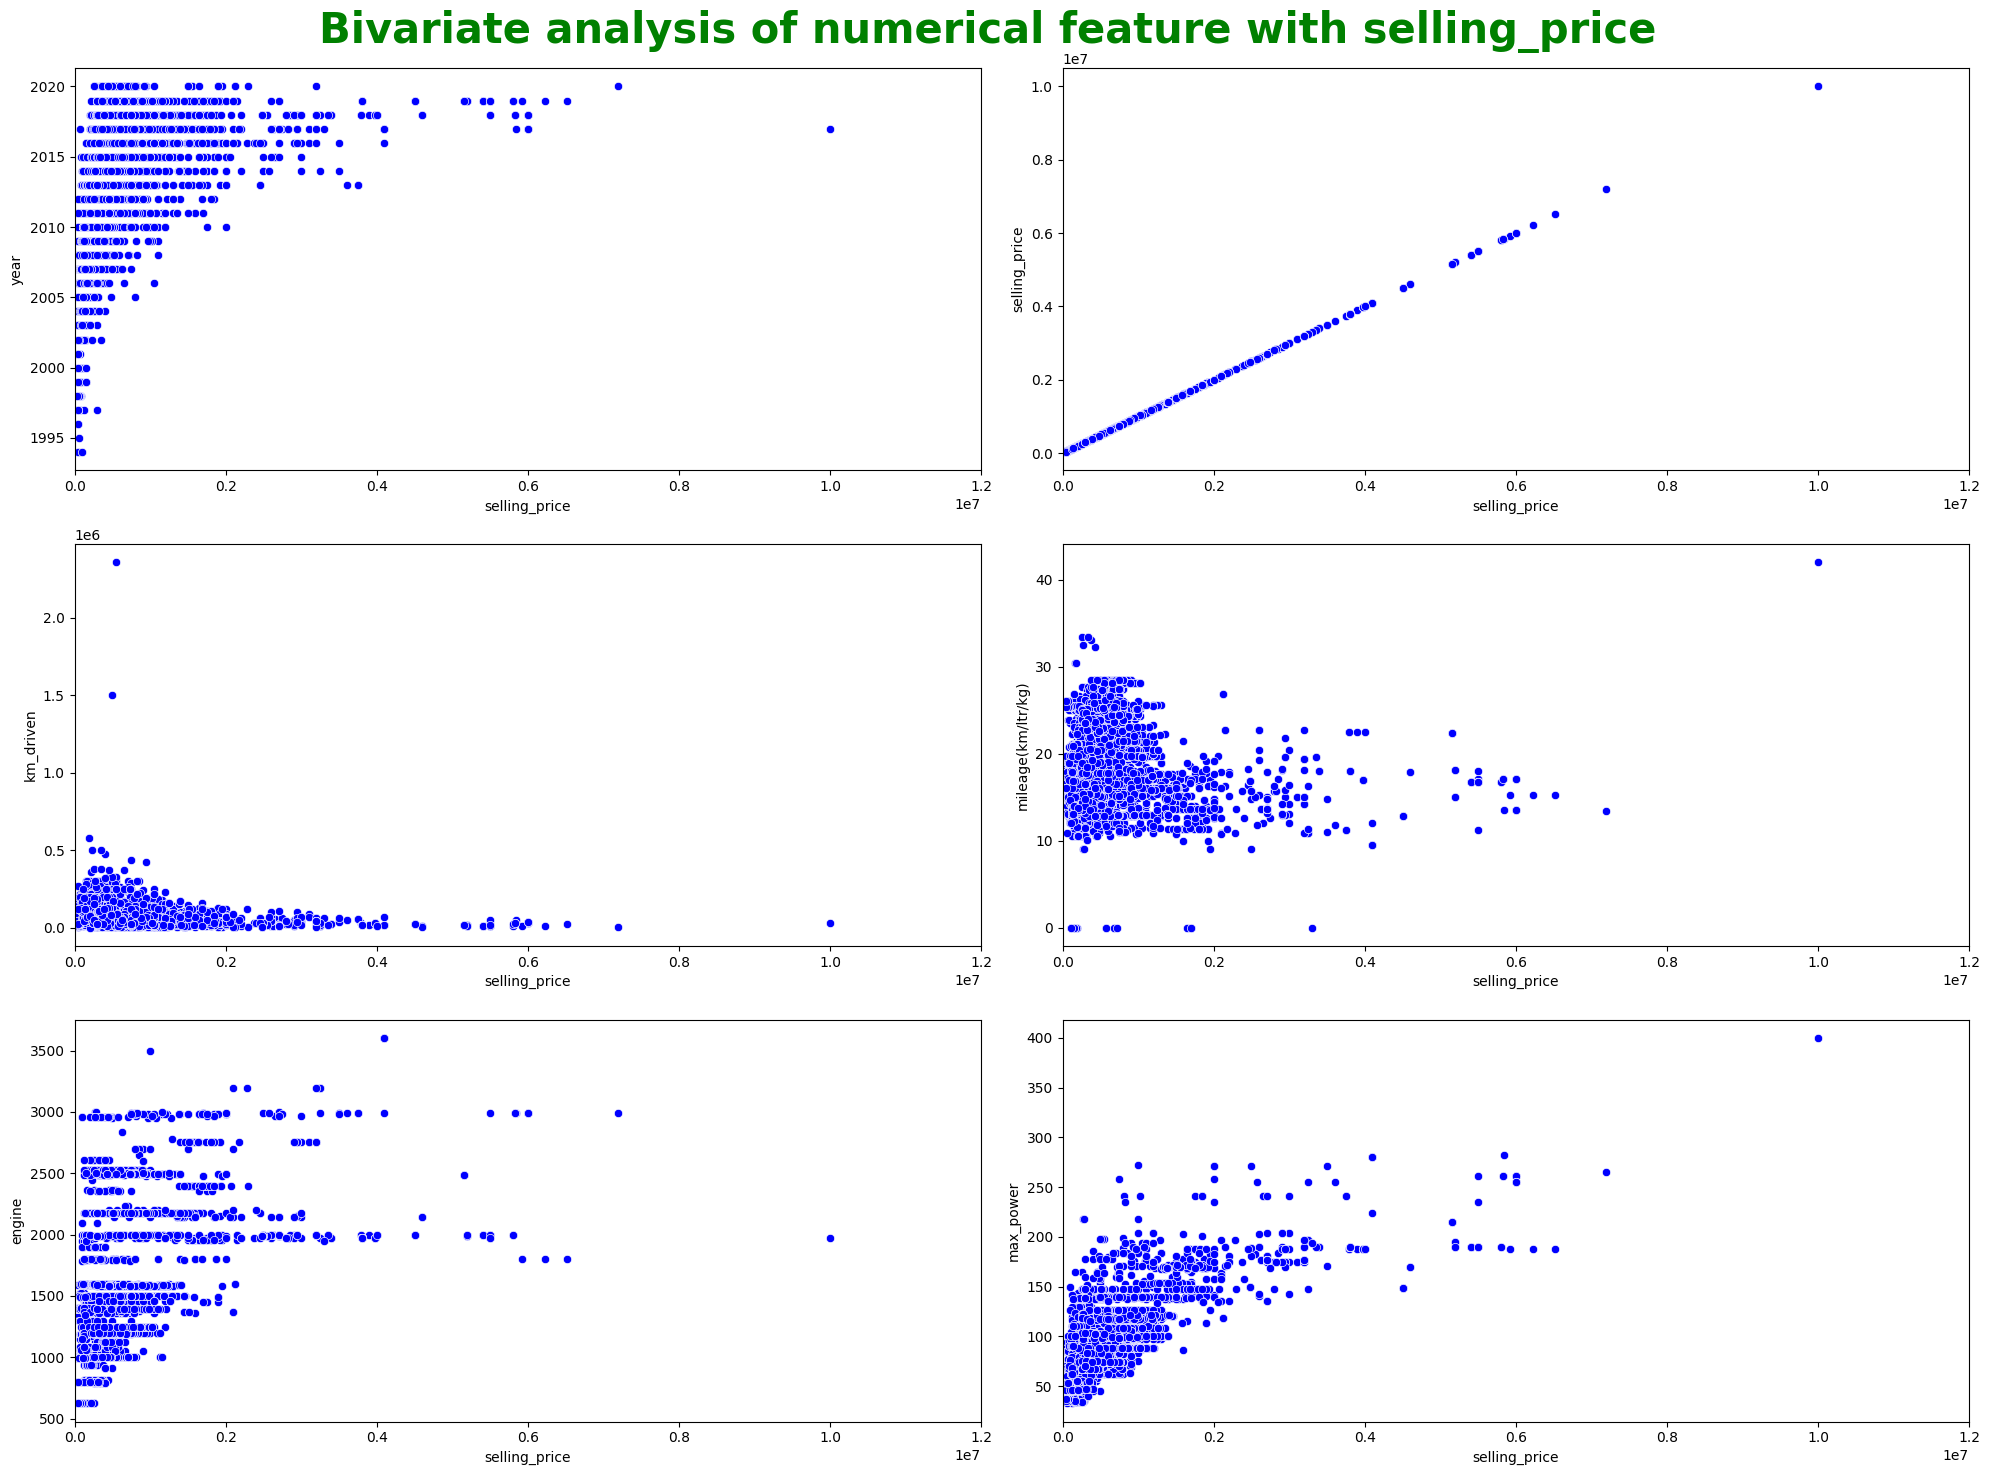

In [68]:
plt.figure(figsize=(20,15))
plt.suptitle("Bivariate analysis of numerical feature with selling_price ",fontsize=30,fontweight='bold',color='g')




for  i in range(0,len(continues_features)):
    plt.subplot(3, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continues_features[i], color='b')
    plt.xlim(0,12000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()



## Initial Report

* vehicle price decreasing  with the age of the vehicle
* kilometer driven has negative impact on selling price
* maximum of the cars milege is between 10 to 30 kml
* vehicle price will be increasing with the engine cubic capacity(cc)
* 4 to 7 seater car has high selling price

(0.0, 2000000.0)

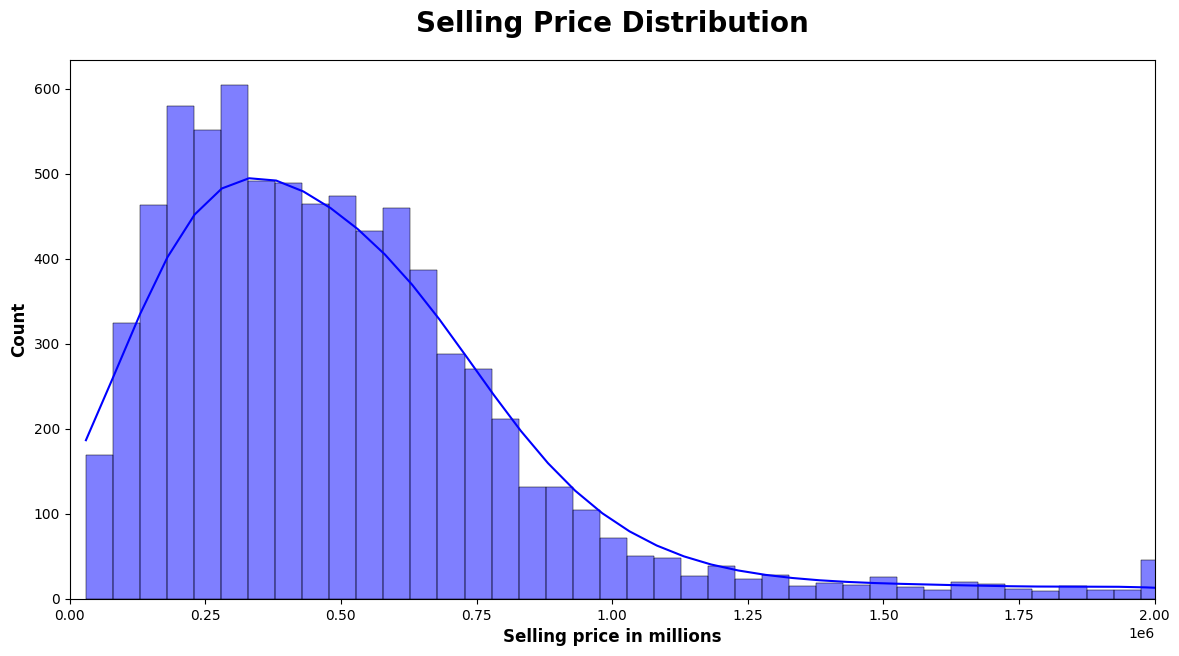

In [69]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,2000000)

**Report** 
* From the chart it is clear that selling price is positively skewed .

(-1.0, 9.5)

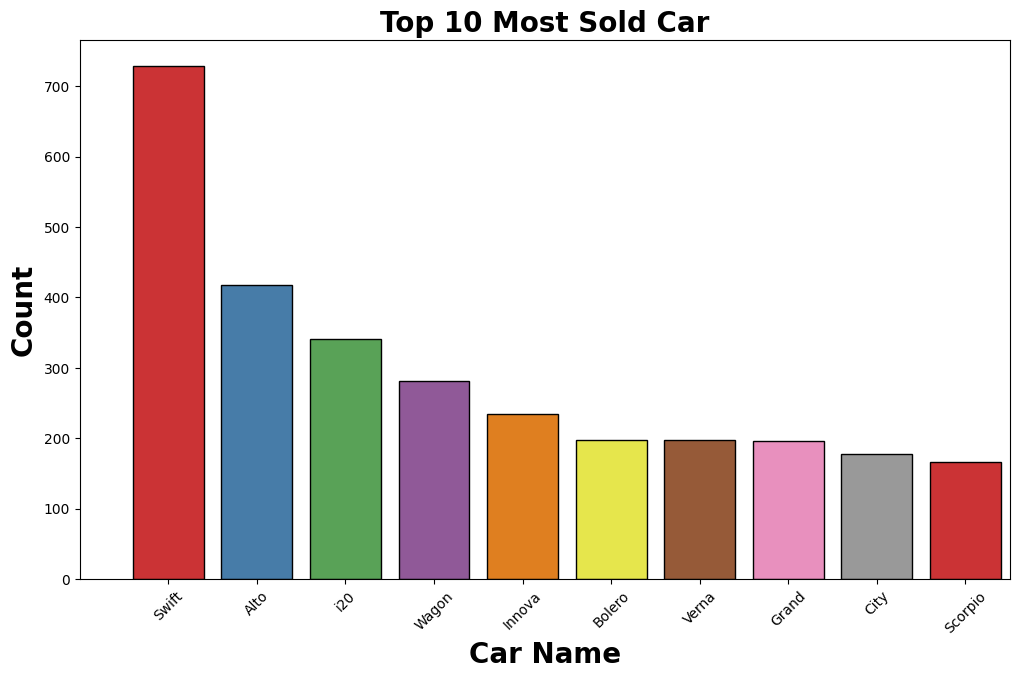

In [70]:
plt.subplots(figsize=(12,7))
sns.countplot(x='model',data=df,ec="black",palette='Set1',order=df['model'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20)
plt.xlabel("Car Name" ,weight="bold",fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Count" ,weight="bold",fontsize=20)
plt.xlim(-1,9.5)

### Check mean price of Swift which is most sold

In [71]:
sw = df[df['model'] == 'Swift']['selling_price'].mean()
print(f"The Average selling price of Swift is {sw:.2f} Rupees.")

The Average selling price of Swift is 498006.81 Rupees.


**Report** 
* Most sold car is swift followed by alto ,i20 and wagonr.
* The Average selling price of Swift is 483476.93 Rupees.
* Swift has around 9.5 % share.

In [72]:
df['brand'].value_counts()[0:10]

brand
Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          466
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
Name: count, dtype: int64

In [73]:
round(df['brand'].value_counts(normalize=True) * 100,2).head(5)


brand
Maruti      29.94
Hyundai     17.20
Mahindra     9.59
Tata         9.09
Honda        5.89
Name: proportion, dtype: float64

(-1.0, 9.5)

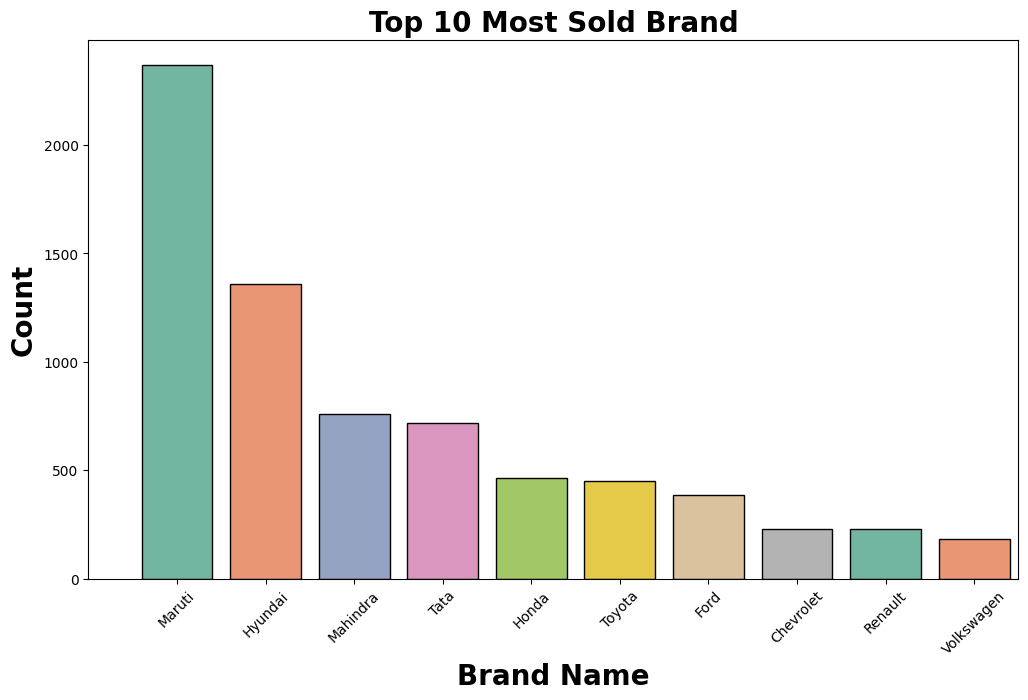

In [74]:
plt.subplots(figsize=(12,7))
sns.countplot(x='brand',data=df,ec="black",palette='Set2',order=df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20)
plt.xlabel("Brand Name" ,weight="bold",fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Count" ,weight="bold",fontsize=20)
plt.xlim(-1,9.5)

In [75]:
sb = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f"The Average selling price of Swift is {sb:.2f} Rupees.")

The Average selling price of Swift is 409011.14 Rupees.


**Report** 
* Most sold brand is Maruti followed by Hyundai ,Mahindra and Tata.
* The Average selling price of Maruti is 403075.72 Rupees.
* Maruti has around 30% market share.

## Costliest Brand and Costliest Car 

In [76]:
brand = df.groupby('brand').selling_price.max()
# print(type(brand))
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Volvo,10000000
BMW,7200000
Audi,6523000
Mercedes-Benz,6000000
Lexus,5150000
Land,4500000
Jeep,4100000
Toyota,3500000
Jaguar,3500000


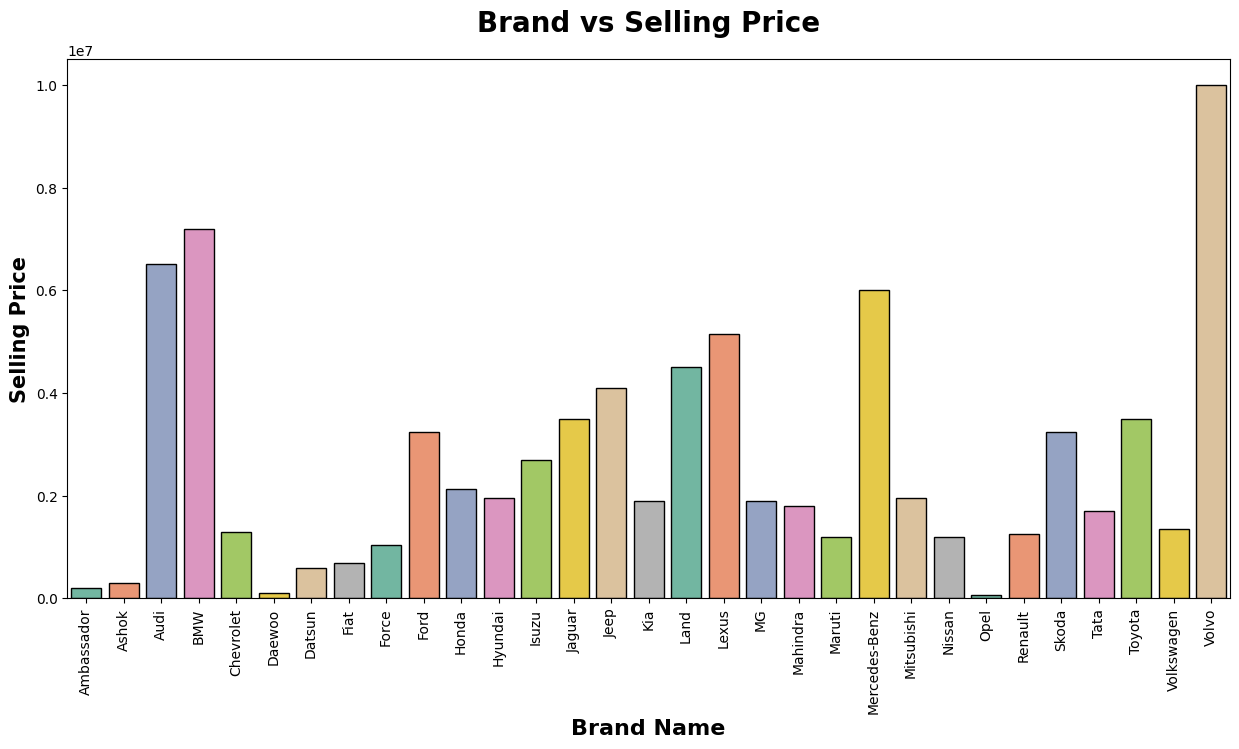

In [77]:
plt.subplots(figsize=(15,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set2")
plt.title("Brand vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
* Costliest Brand sold is Volvo at 1 Crores.
* Second most costliest car Brand is Rolls-Royce as 72lacs BMW.
* Brand name has very clear impact on selling price.

## Costliest Car

In [78]:
car= df.groupby('name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
name,
Volvo XC90 T8 Excellence BSIV,10000000
BMW X7 xDrive 30d DPE,7200000
Audi A6 35 TFSI Matrix,6523000
Mercedes-Benz S-Class S 350 CDI,6000000
BMW 6 Series GT 630d Luxury Line,6000000
BMW X4 M Sport X xDrive20d,5800000
Volvo XC60 Inscription D5 BSIV,5500000
Volvo S90 D4 Inscription BSIV,5500000
BMW 5 Series 520d Luxury Line,5200000


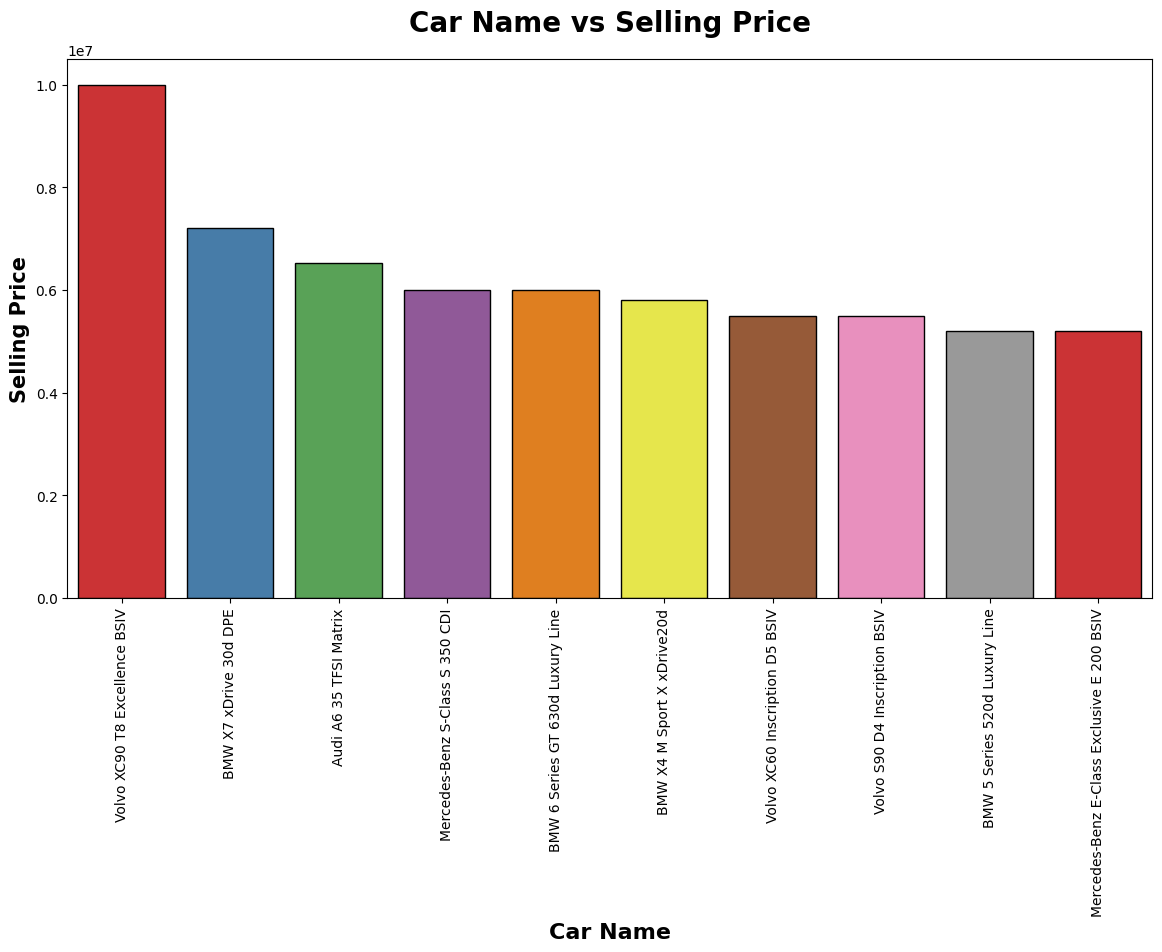

In [79]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report**
* Costliest Car sold is Volvo XC90  followed by BMW X7.
* Ferrari selling price is 1 Crs.


## Most Mileage Car Name

In [80]:
mileage_C= round(df.groupby('model')['mileage(km/ltr/kg)'].mean().sort_values(ascending=False).head(10),2)
mileage_C.to_frame()

,mileage(km/ltr/kg)
model,
XC90,42.00
Ciaz,25.88
S-Cross,25.10
Nano,25.03
Tiago,24.50
KWID,24.30
Vitara,24.23
Baleno,24.15
Platinum,23.59


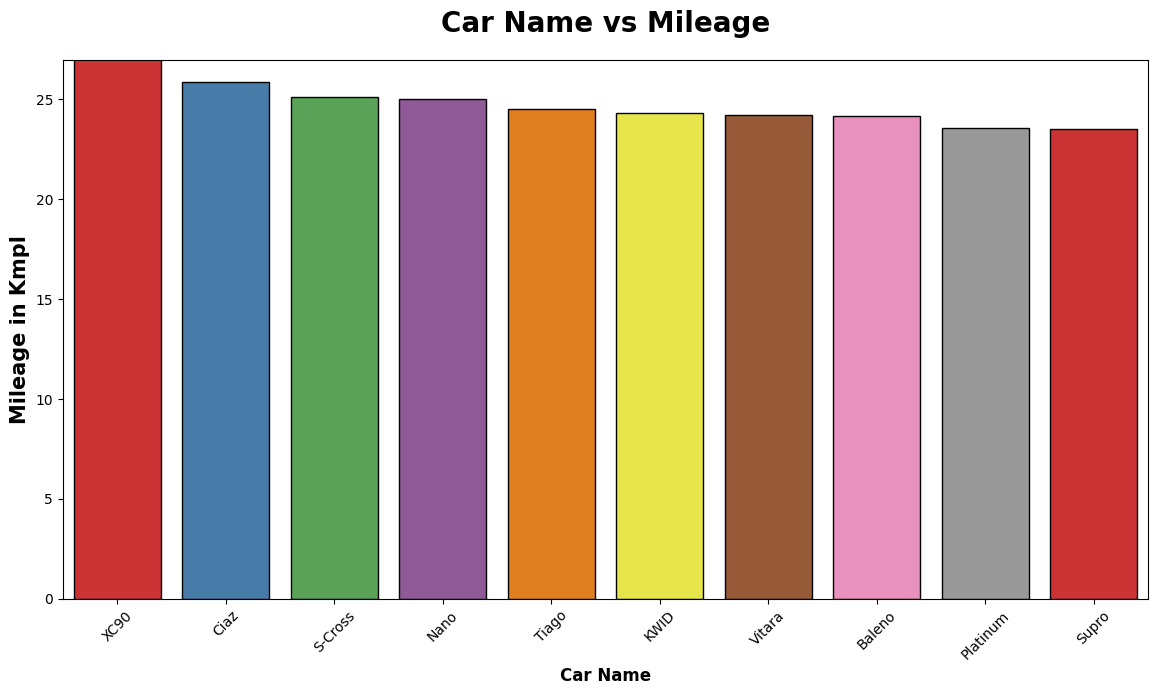

In [81]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_C.index, y=mileage_C.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## Kilometer driven vs Selling Price 

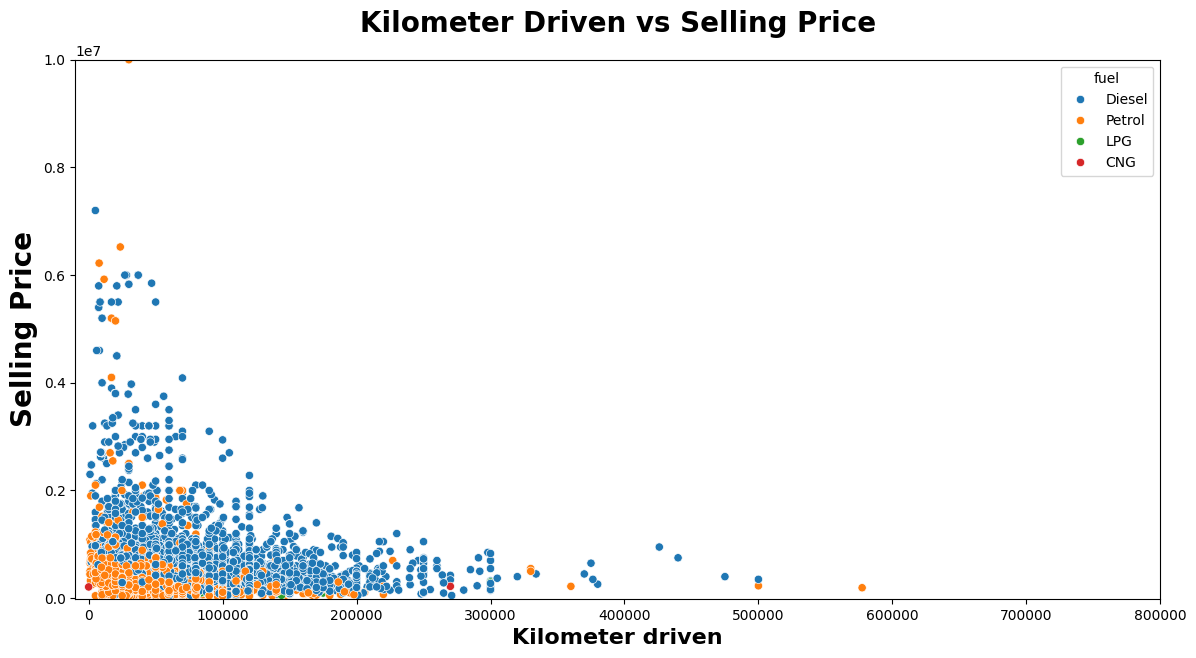

In [82]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x='km_driven', y='selling_price', data=df,ec = "white",color='b', hue='fuel')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

**Report**
* Many Cars were sold with kms between 0 to 20k Kilometers 
* Low Kms driven cars had more selling price compared to cars which had more kms driven.

## Most sold Fuel type

In [83]:
fuel = df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel,
Diesel,802450.282624
Petrol,472665.203125
CNG,317903.788462
LPG,210885.714286


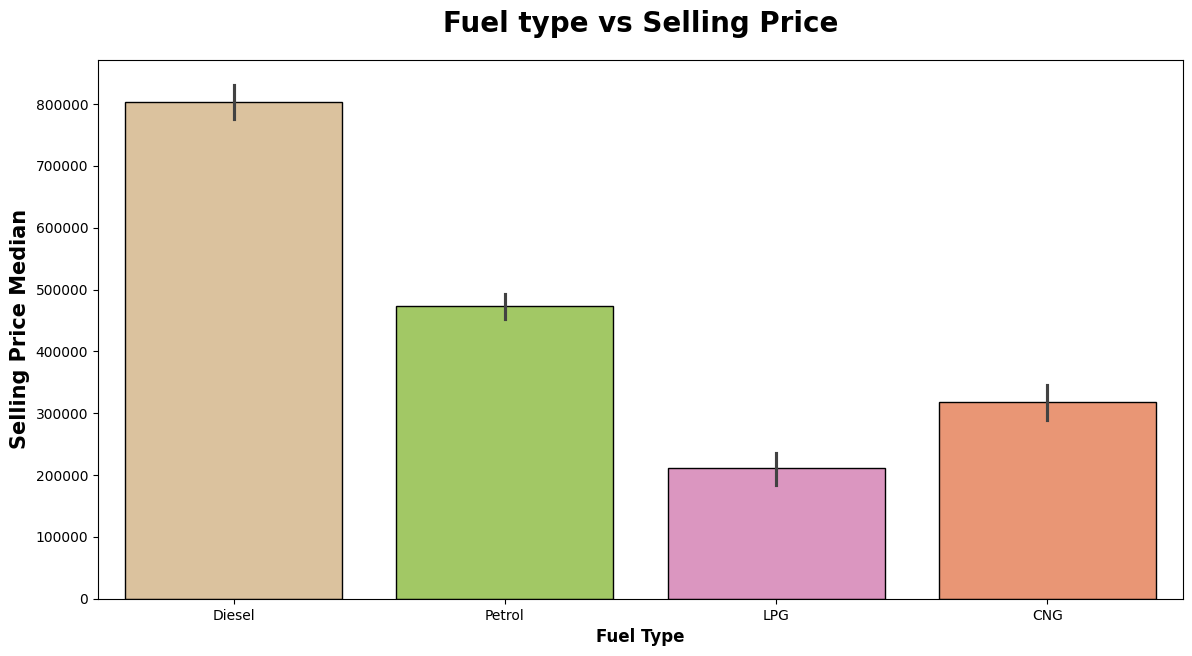

In [84]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel, y=df.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

**Report**
* Diesel cars have highers selling average price.
* Followed by Petrol and CNG.


### Most sold Fuel type

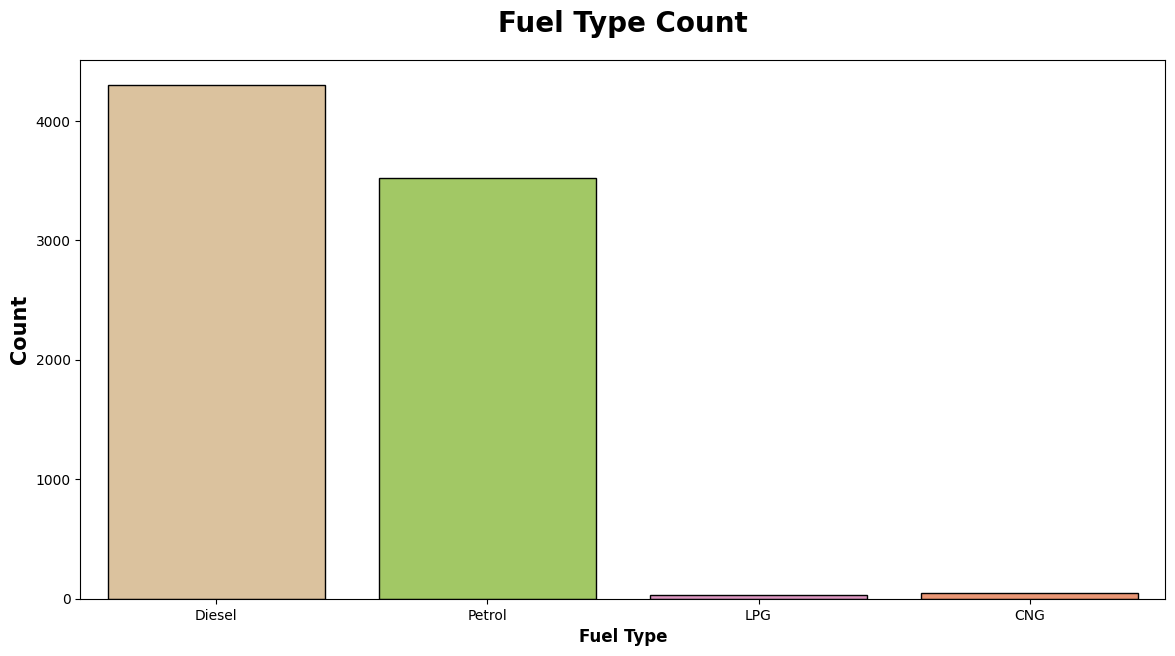

In [85]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

**Report** 
* Petrol and Diesel dominate the used car market in the website.
* The most sold fuel type Vechicle is Petrol.
* Followed by diesel and CNG and least sold is Electric

### Fuel types available and mileage given

In [86]:
fuel_mileage = df.groupby('fuel')['mileage(km/ltr/kg)'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage(km/ltr/kg)
fuel,
CNG,24.420769
Diesel,19.642624
Petrol,19.082301
LPG,18.577143


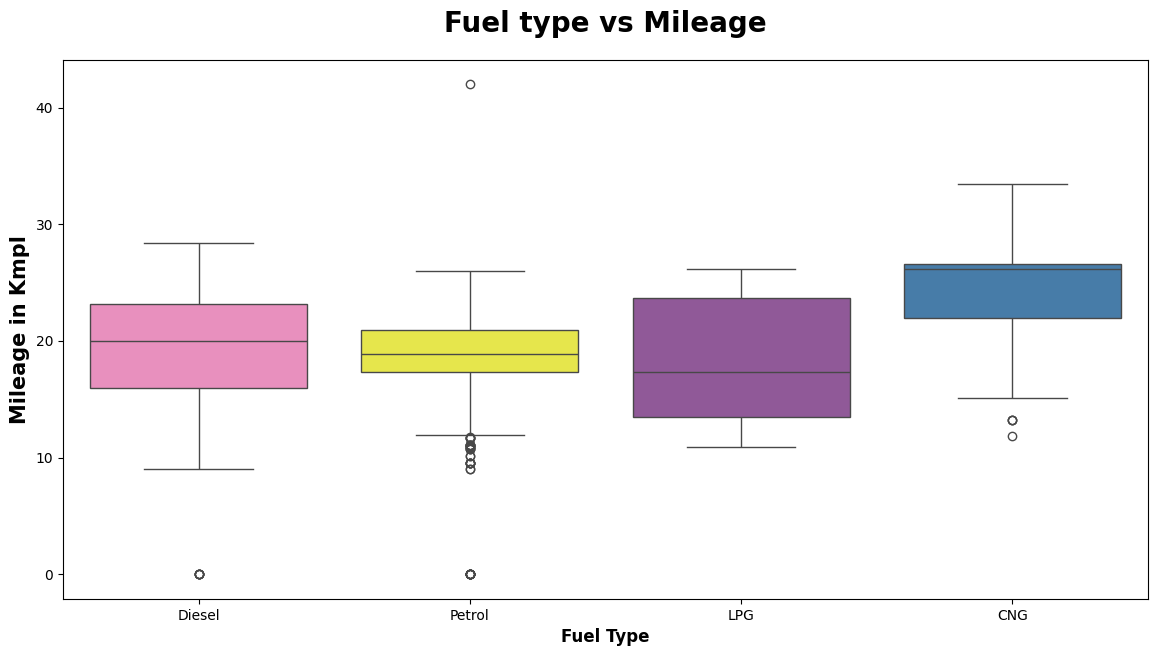

In [88]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel', y='mileage(km/ltr/kg)', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

In [91]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand', 'model'],
      dtype='object')

## Transmission Type

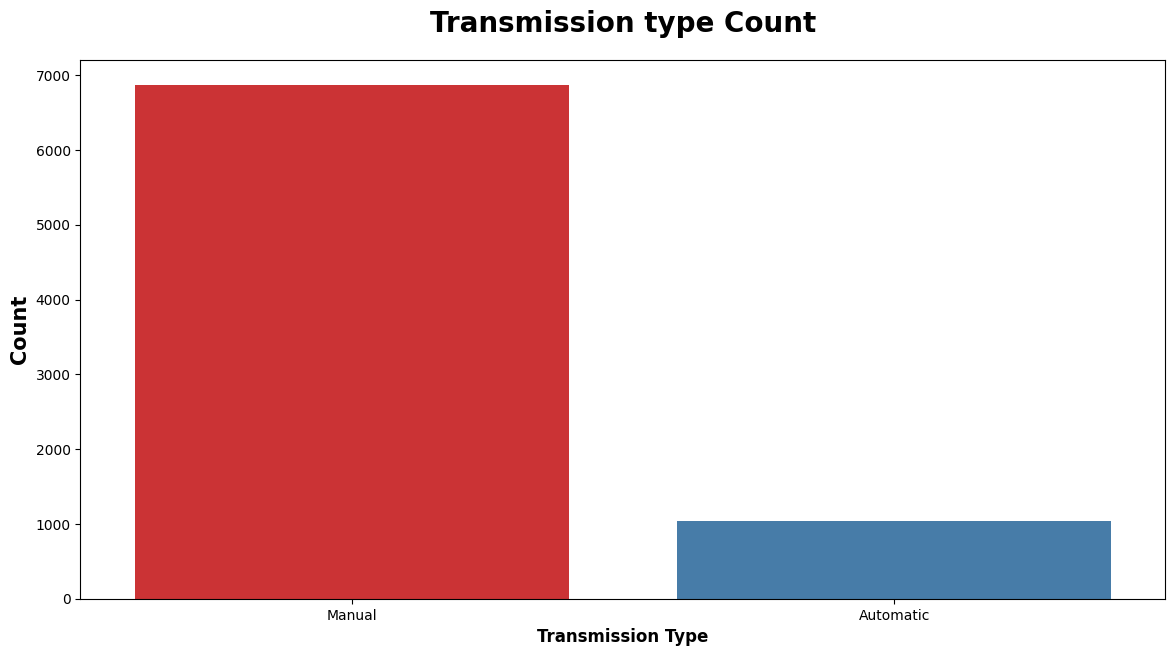

In [92]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

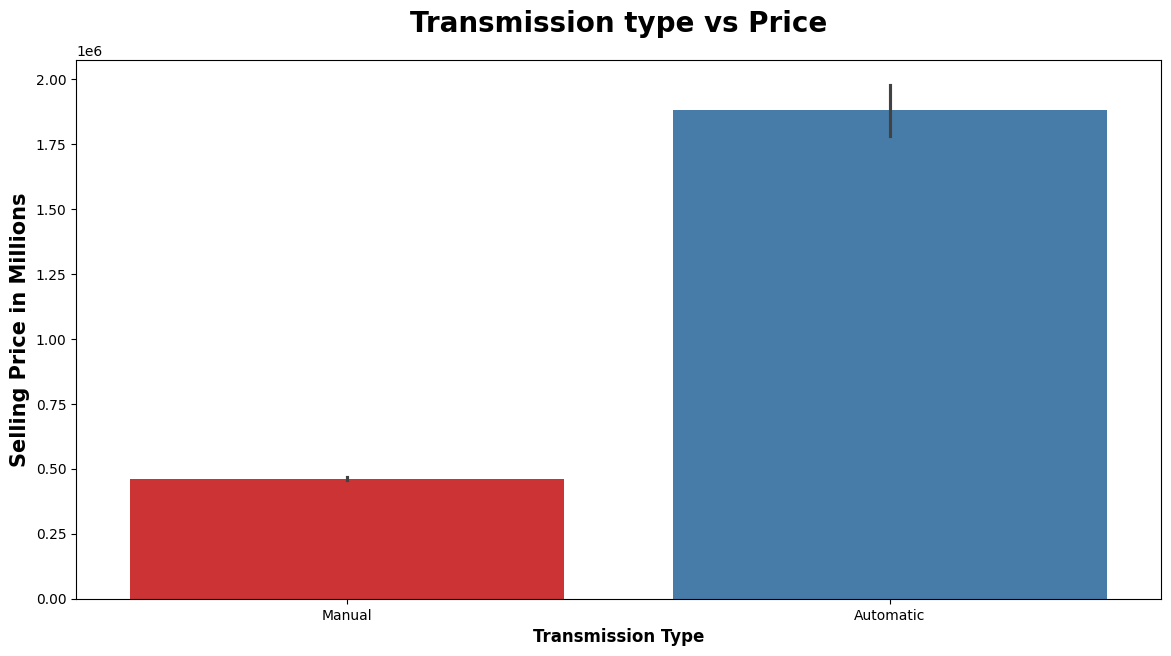

In [93]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

**Report** 
* Manual Transmission was found in most of the cars which was sold.
* Automatic cars have more selling price than manual cars.

In [97]:
df.shape

(7906, 14)

## Final Report

* The datatypes and Column names were right and there was 7906 rows and 14 columns
* The `selling_price` column is the target to predict. i.e Regression Problem.
* There are outliers in most of  the columns.
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
* We just need less data cleaning for this dataset.

In [ ]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################